Slope 	 % Error in Slope
0.000 	 51676998144391416.00% 
-0.006 	 9.71% 
-0.029 	 7.69% 
-0.063 	 5.45% 
-0.097 	 3.60% 
-0.127 	 2.26% 
-0.152 	 1.47% 
-0.173 	 1.31% 
-0.190 	 1.59% 
-0.204 	 1.99% 
-0.217 	 2.39% 


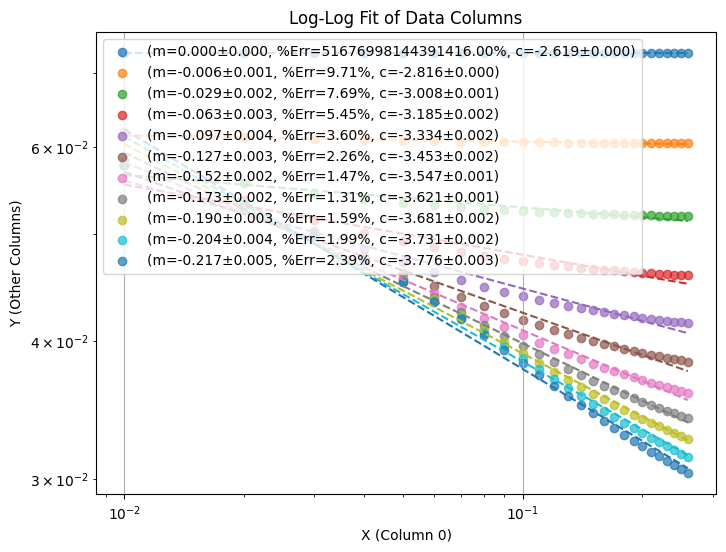

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Read the data file (skip the first two rows)
def read_data(filename):
    data = np.loadtxt(filename, skiprows=1)
    return data

# Function to compute slope, intercept, and their errors
def compute_slope_intercept(x, y):
    log_x = np.log(x)
    log_y = np.log(y)
    
    # Perform linear regression on log-log transformed data
    slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)
    
    # Compute standard error for intercept manually
    n = len(log_x)
    x_mean = np.mean(log_x)
    s_xx = np.sum((log_x - x_mean) ** 2)
    intercept_err = std_err * np.sqrt(np.sum(log_x ** 2) / (n * s_xx))
    
    # Compute percentage error in the slope
    percent_error_slope = (std_err / abs(slope)) * 100 if slope != 0 else np.nan
    
    return slope, intercept, std_err, intercept_err, r_value**2, percent_error_slope

# Function to plot data and fit a straight line
def plot_and_fit(data):
    x = data[:, 0]  # First column as independent variable
    
    plt.figure(figsize=(8, 6))
    print(f"Slope \t % Error in Slope")
    
    for i in range(1, data.shape[1]):  # Iterate over other columns
        y = data[:, i]
        
        # Compute slope, intercept, and their errors
        slope, intercept, slope_err, intercept_err, r_squared, percent_error_slope = compute_slope_intercept(x, y)
        
        # Generate fitted line (exponential fit in original space)
        y_fit = np.exp(intercept) * x**slope
        
        # Plot data
        plt.scatter(x, y, label=f'(m={slope:.3f}±{slope_err:.3f}, %Err={percent_error_slope:.2f}%, c={intercept:.3f}±{intercept_err:.3f})', alpha=0.7)
        plt.plot(x, y_fit, linestyle='--')

        # Print regression details
        print(f"{slope:.3f} \t {percent_error_slope:.2f}% ")

    plt.xlabel("X (Column 0)")
    plt.ylabel("Y (Other Columns)")
    plt.xscale("log")  # Set log scale for better visualization
    plt.yscale("log")  # Set log scale for better visualization
    plt.title("Log-Log Fit of Data Columns")
    plt.legend()
    plt.grid()
    plt.show()

# Main execution
filename = "E:\\Samudro\\Mine\\PhD Work\\Work\\Rate_MFPT\\Normal_bistable\\Smoluchowski\\R_vs_Dp\\Dm_012.txt"
data = read_data(filename)
plot_and_fit(data)
